## Dog Breeds

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

PATH = "data/dogbreed/"
sz=224
arch=resnext50
bs=24
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)
files = !ls {PATH}train | head
files

['000bec180eb18c7604dcecc8fe0dba07.jpg',
 '001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '001cdf01b096e06d78e9e5112d419397.jpg',
 '00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '002211c81b498ef88e1b40b9abf84e1d.jpg',
 '00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '002a283a315af96eaea0e28e7163b21b.jpg',
 '003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '0042188c895a2f14ef64a918ed9c7b64.jpg']

In [3]:
!rm -rf {PATH}tmp

In [4]:
ImageClassifierData.from_csv?

In [4]:
label_df = pd.read_csv(label_csv)
label_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


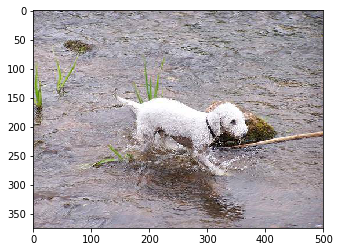

In [5]:
img = plt.imread(f'{PATH}train/{files[5]}')
plt.imshow(img);

In [6]:
label_df.pivot_table(index='breed', aggfunc=len).sort_values('id', ascending=False)

,id
breed,
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
shih-tzu,112
great_pyrenees,111
pomeranian,111
basenji,110


In [7]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms, bs=bs, num_workers=4, test_name='test', val_idxs=val_idxs)

In [8]:
fn = PATH+data.trn_ds.fnames[2]; fn

'data/dogbreed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg'

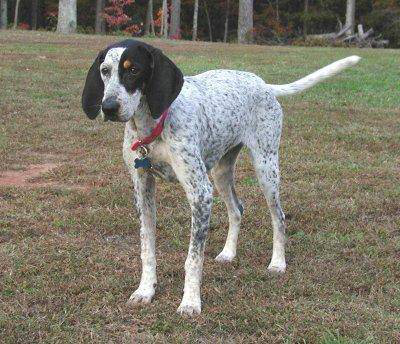

In [9]:
img = PIL.Image.open(fn); img

In [10]:
img.size

(400, 344)

In [11]:
size_d = {k: PIL.Image.open(PATH+k).size for k in data.trn_ds.fnames}
row_sz, col_sz = list(zip(*size_d.values()))
row_sz=np.array(row_sz); col_sz=np.array(col_sz)

In [12]:
row_sz[:5]

array([500, 500, 400, 500, 231])

In [13]:
col_sz[:5]

array([375, 375, 344, 470, 227])

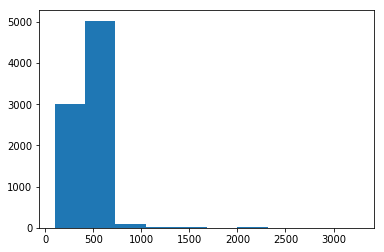

In [14]:
plt.hist(row_sz);

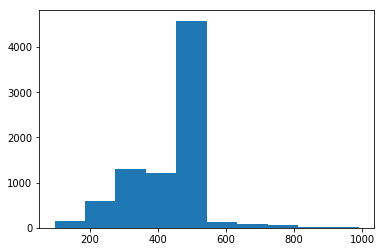

In [15]:
plt.hist(row_sz[row_sz<1000]);

In [16]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms, bs=bs, num_workers=4, test_name='test', val_idxs=val_idxs)
    return data if sz>300 else data.resize(340, 'tmp')

In [17]:
data = get_data(sz, bs)

A Jupyter Widget

In [20]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=0.5)

100%|██████████| 432/432 [01:22<00:00,  5.26it/s]


In [21]:
learn.lr_find()

A Jupyter Widget

  4%|▎         | 12/341 [00:00<00:17, 18.50it/s, loss=5.32]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 82%|████████▏ | 278/341 [00:04<00:01, 61.81it/s, loss=8.97]


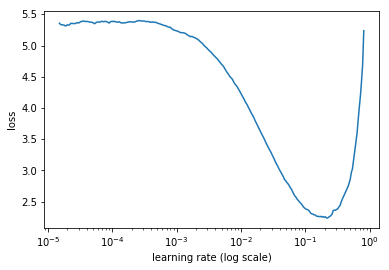

In [22]:
learn.sched.plot()

In [23]:
learn.fit(9e-2, 2)
learn.precompute=False

A Jupyter Widget

  4%|▍         | 14/341 [00:00<00:05, 59.07it/s, loss=3.91]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.87159  0.45544  0.86822]                        
[ 1.       0.77377  0.43229  0.87064]                         



In [24]:
learn.fit(1e-2, 5, cycle_len=1)

A Jupyter Widget

  0%|          | 1/341 [00:00<02:47,  2.03it/s, loss=0.204]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


[ 0.       0.48419  0.32772  0.90407]                        
[ 1.       0.49184  0.31017  0.90988]                        
[ 2.       0.42781  0.30276  0.90795]                        
[ 3.       0.42983  0.29612  0.91134]                        
[ 4.       0.38766  0.29882  0.91085]                        



In [25]:
learn.lr_find()

A Jupyter Widget

  0%|          | 1/341 [00:00<03:12,  1.77it/s, loss=0.38]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


 81%|████████  | 275/341 [00:53<00:12,  5.15it/s, loss=1.27] 

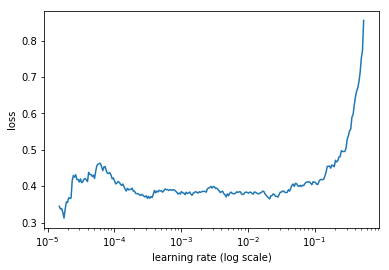

In [26]:
learn.sched.plot()

In [27]:
learn.set_data(get_data(299, bs))

A Jupyter Widget

In [28]:
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

A Jupyter Widget


  0%|          | 1/341 [00:00<03:39,  1.55it/s, loss=0.899]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



  4%|▍         | 14/341 [00:04<01:43,  3.16it/s, loss=0.435]

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
Exception in thread Thread-24:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




 20%|██        | 69/341 [00:19<01:18,  3.46it/s, loss=0.365]

In [26]:
learn.save('299_expanded_size')

learn.fit(1e-2, 5, cycle_len=1)

In [27]:
learn.lr_find()

A Jupyter Widget


  0%|          | 0/341 [00:00<?, ?it/s, loss=0.386]

/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/nn/modules/container.py:72: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)



 38%|███▊      | 128/341 [00:46<01:17,  2.73it/s, loss=0.306]


 74%|███████▍  | 253/341 [01:28<00:30,  2.85it/s, loss=1.08] 
                                                            

Exception in thread Thread-23:
Traceback (most recent call last):
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/bmn/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



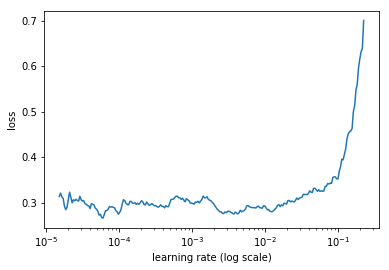

In [28]:
learn.sched.plot()

In [29]:
learn.unfreeze()
lr=np.array([1e-4,1e-3,1e-2])

In [30]:
learn.fit(1e-2, 5, cycle_len=1)

A Jupyter Widget


  0%|          | 0/341 [00:00<?, ?it/s]

RuntimeError: cuda runtime error (2) : out of memory at /home/bmn/src/ai.learn/pytorch/pytorch/aten/src/THC/generic/THCStorage.cu:58

In [18]:
learn.save('224_all_50')

In [9]:
learn.load('224_all_50')

In [19]:
log_preds,y = learn.TTA()
accuracy(log_preds,y)

0.99750000000000005

## Analyzing results

In [20]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[996   4]
 [  1 999]]


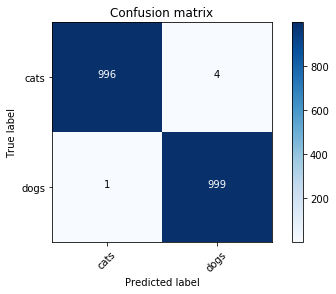

In [22]:
plot_confusion_matrix(cm, data.classes)

In [23]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most incorrect cats


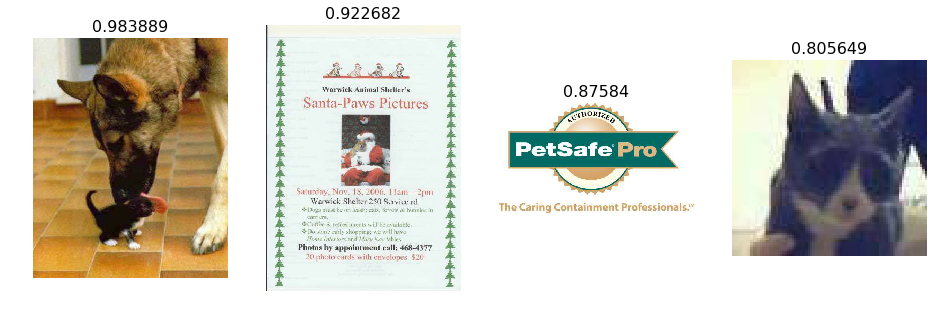

In [28]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


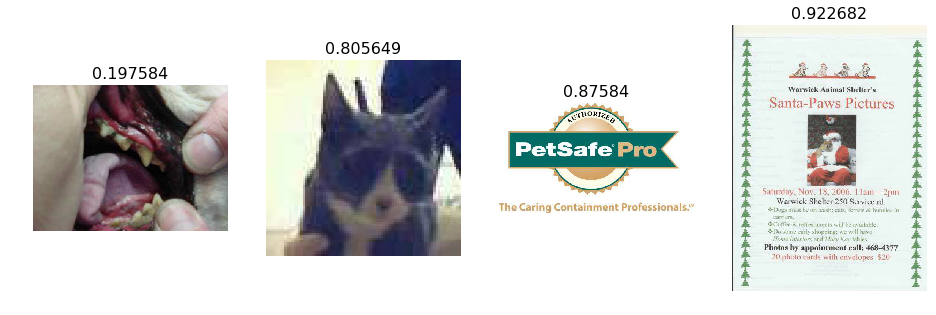

In [29]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")